## **Customer Segmentation using K-Means Clustering**

Customer segmentation is the method of distributing a customer base into collections of people based on mutual characteristics so organizations can market to group efficiently and competently individually.

The purpose of segmenting customers is to determine how to correlate to customers in multiple segments to maximize customer benefits. Perfectly done customer segmentation empowers marketers to interact with every customer in the best efficient approach.

The data includes the following features:
1. Customer ID
2. Customer Gender
3. Customer Age
4. Annual Income of the customer (in Thousand Dollars)
5. Spending score of the customer (based on customer behaviour and spending nature)









Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
# Generate descriptive statistics of the DataFrame (df)
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Display concise information about the DataFrame (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Generate descriptive statistics for the 'Gender' column in the DataFrame (df)
df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

C:\Users\Krutika\AppData\Local\Temp\ipykernel_19868\3028493544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=['skyblue', 'salmon'])


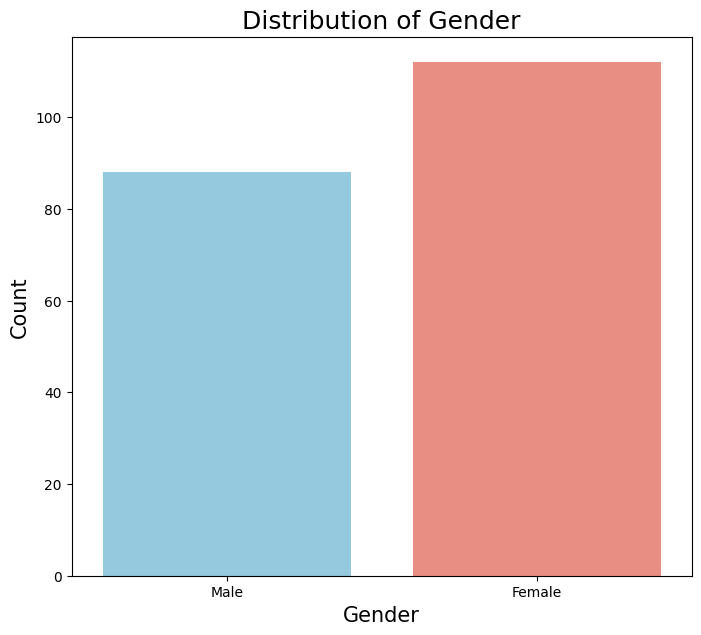

In [8]:
# Create a countplot for the 'Gender' column in the DataFrame (df)
plt.figure(figsize=(8, 7))
sns.countplot(x='Gender', data=df, palette=['skyblue', 'salmon'])
plt.xlabel("Gender", fontsize=15)  # Set the label for the x-axis
plt.ylabel("Count", fontsize=15)  # Set the label for the y-axis
plt.title("Distribution of Gender", fontsize=18)  # Set the title
plt.show()  # Display the plot



C:\Users\Krutika\AppData\Local\Temp\ipykernel_19868\382067987.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], color="Green")


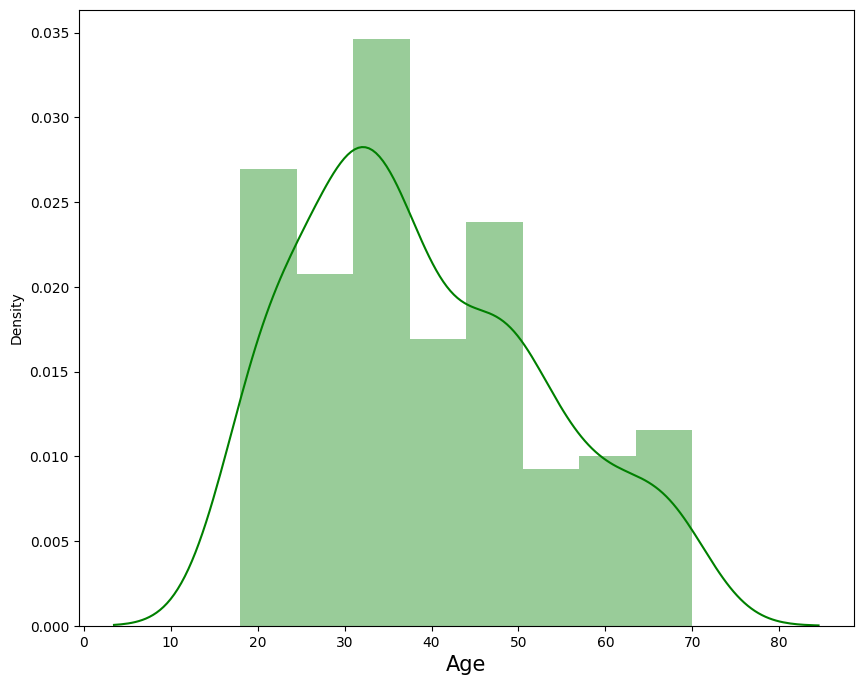

In [9]:
# Create a distribution plot for the 'Age' column in the DataFrame (df)
plt.figure(figsize=(10, 8))
sns.distplot(df["Age"], color="Green")
plt.xlabel("Age", fontsize=15)
plt.show()


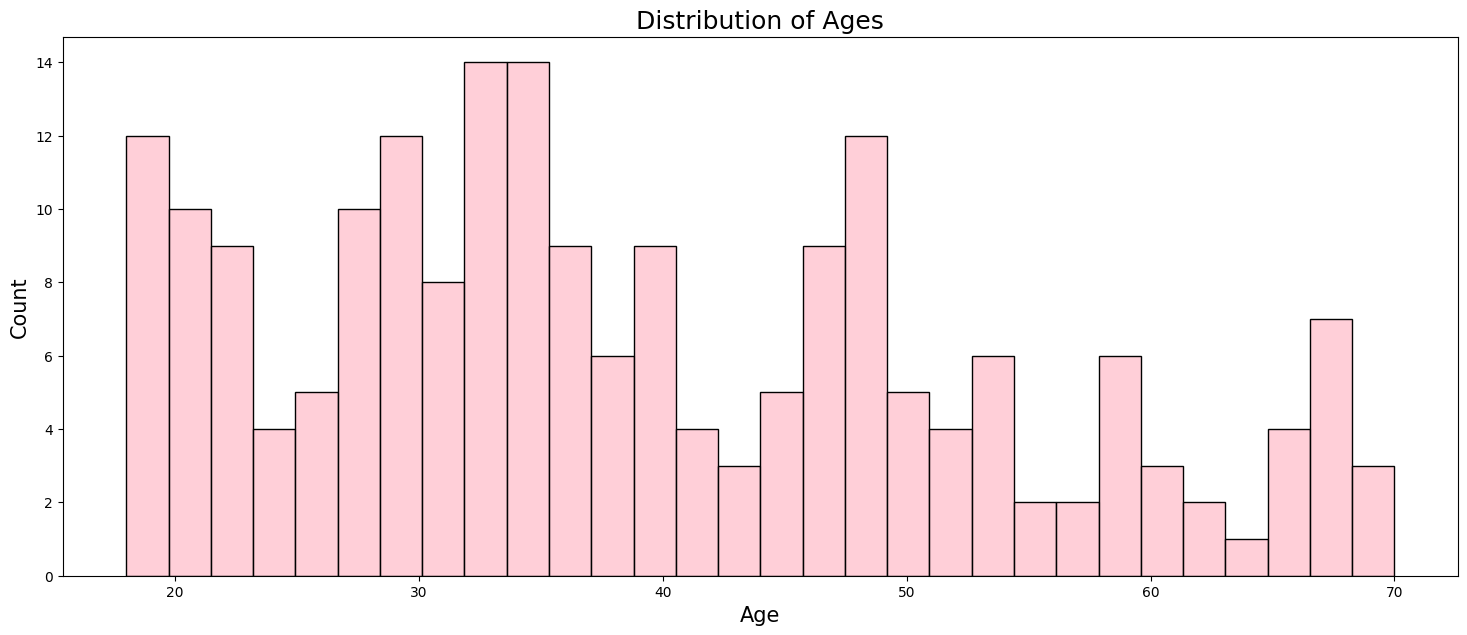

In [10]:
# Create a histogram for the 'Age' column in the DataFrame (df)
plt.figure(figsize=(18, 7))
sns.histplot(df["Age"], bins=30, kde=False, color="pink")  #kde = kernel density = false
plt.xlabel("Age", fontsize=15)  # Set the label for the x-axis
plt.ylabel("Count", fontsize=15)  # Set the label for the y-axis
plt.title("Distribution of Ages", fontsize=18)  # Set the title
plt.show()  # Display the plot


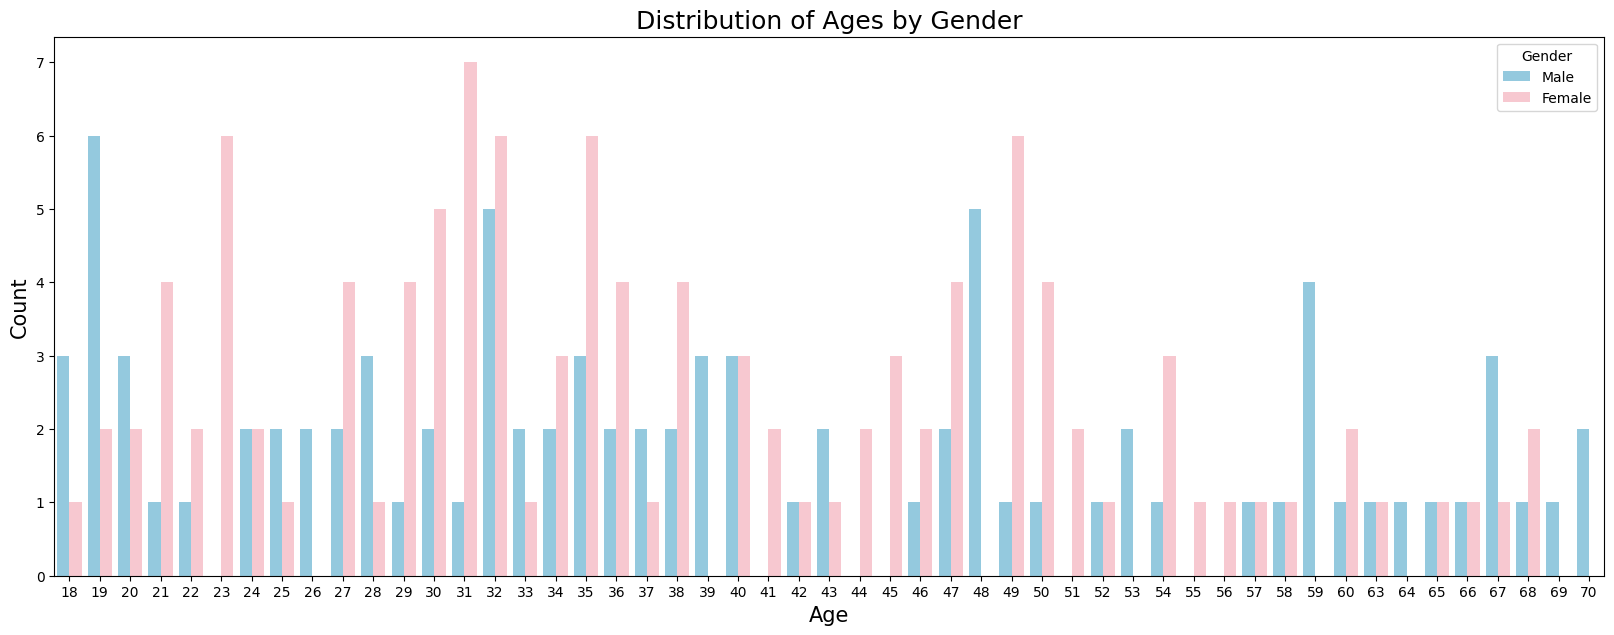

In [11]:
# Define a custom color palette
custom_palette = {"Male": "skyblue", "Female": "pink"}

# Create a countplot for the 'Age' column in the DataFrame (df) with custom colors for each gender
plt.figure(figsize=(20, 7))  # Set the figure size
sns.countplot(data=df, x="Age", hue="Gender", palette=custom_palette)  # Use the custom color palette
plt.xlabel("Age", fontsize=15)  # Set the label for the x-axis
plt.ylabel("Count", fontsize=15)  # Set the label for the y-axis
plt.title("Distribution of Ages by Gender", fontsize=18)
plt.show()  # Display the plot

In [12]:
# drop the CustomerID Column not required
df.drop(columns = ["CustomerID"],axis=1,inplace = True)

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\Krutika\AppData\Local\Temp\ipykernel_19868\1646490654.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], color="orchid")
C:\Users\Krutika\AppData\Local\Temp\ipykernel_19868\1646490654.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], color="orchid")
C:\Users\K

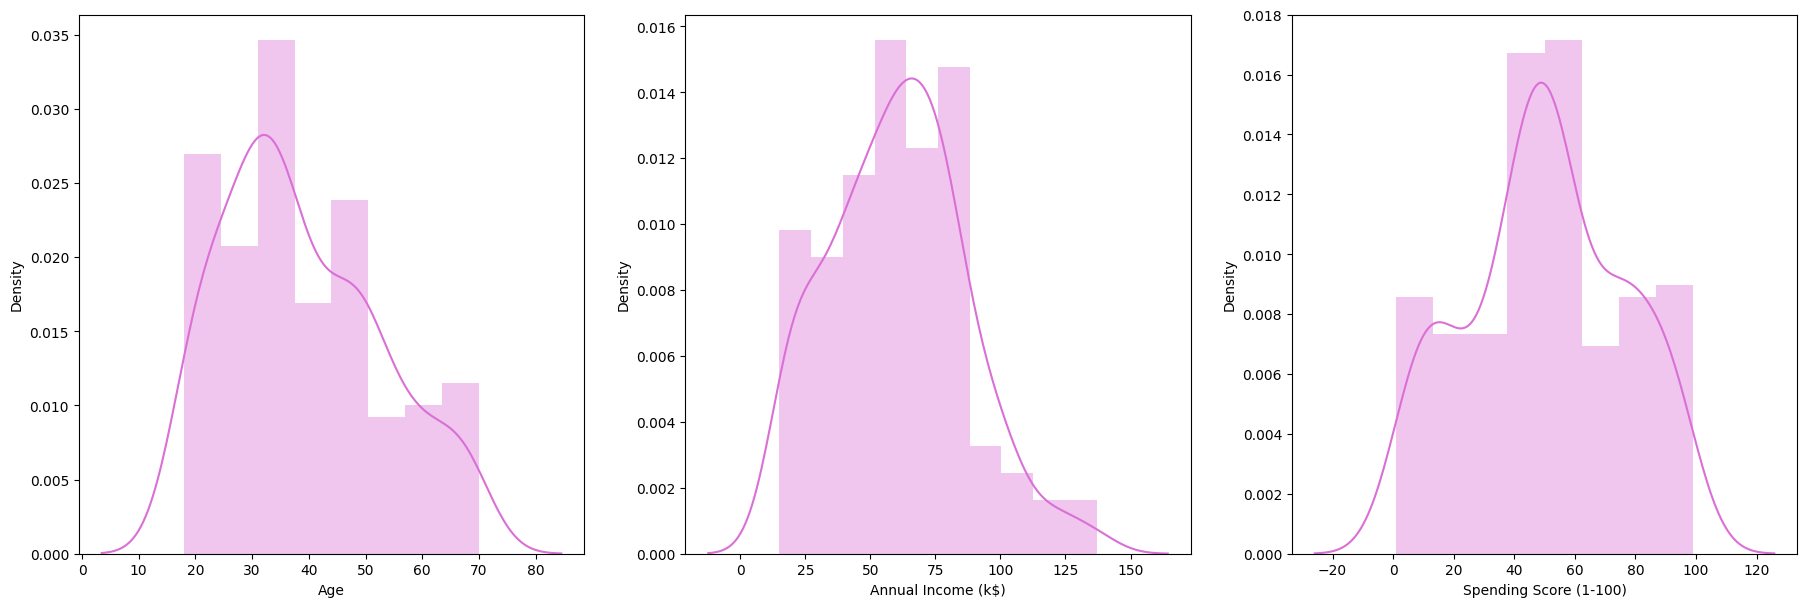

In [14]:
plt.figure(figsize=(30, 7))
plotnumber = 1

for column in df.iloc[:, 1:]:
    if plotnumber <= 4:
        ax = plt.subplot(1, 4, plotnumber)
        sns.distplot(df[column], color="orchid")
        plt.xlabel(column)
    plotnumber += 1

plt.show()

#This code will create a row of  subplots, each displaying the distribution of a different column DataFrame.


In [15]:
# Calculate the mean annual income for individuals identified as female
df['Annual Income (k$)'].loc[df['Gender'] == 'Female'].mean()

59.25

In [16]:
# Calculate the mean annual income for individuals identified as female
df['Annual Income (k$)'].loc[df['Gender']=='Male'].mean()

62.22727272727273

In [17]:
# Group the DataFrame by 'Gender' and calculate the mean for each group
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


## **K-Means Clustering**

K-Means Clustering with Scikit-Learn
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data Labels for the training data (each data point is assigned to a single cluster)

For this particular algorithm to work, the number of clusters has to be defined beforehand. The K in the K-means refers to the number of clusters.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. After that the algorithm iteratively performs three steps:


1. Find the Euclidean distance between each data instance and centroids of all the clusters
2. Assign the data instances to the cluster of the centroid with nearest distance
3. Calculate new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster.

*Example*

In [18]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Majorly focusing on Annual Income and Spending Score**

In [20]:
# Select columns at index positions 2 and 3, then retrieve the column names
df.iloc[:, [2, 3]].columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [21]:
df.iloc[:,[2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
X = df.iloc[:,[2,3]].values

In [23]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [24]:
type(X)

numpy.ndarray

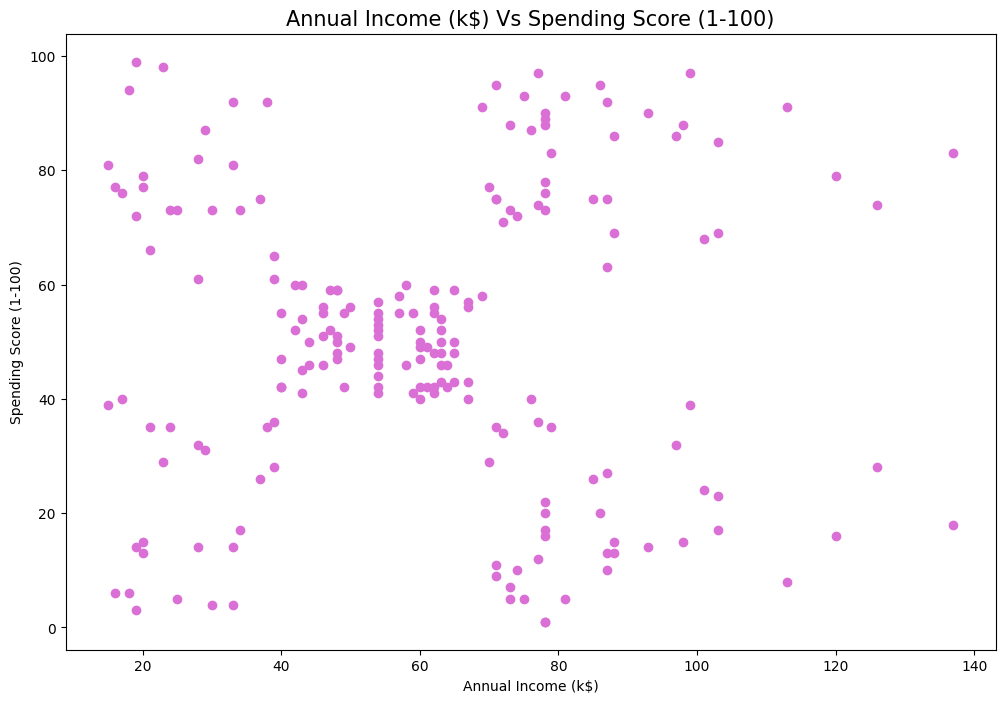

In [25]:
# Create a scatter plot of Annual Income (k$) versus Spending Score (1-100)
plt.figure(figsize=(12, 8))  # Set the figure size
plt.scatter(X[:, 0], X[:, 1], color='orchid')  # Scatter plot using X[:, 0] for x-axis and X[:, 1] for y-axis
plt.xlabel("Annual Income (k$)")  # Set the label for the x-axis
plt.ylabel("Spending Score (1-100)")  # Set the label for the y-axis
plt.title("Annual Income (k$) Vs Spending Score (1-100)", fontsize=15)  # Set the title
plt.show()  # Display the plot


**Implementing KMeans Algorithm**


In [26]:
from sklearn.cluster import KMeans

In [27]:
# Instantiate KMeans with 2 clusters and fit to the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Print the coordinates of the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[90.53488372 25.13953488]
 [52.35031847 57.06369427]]


In [28]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]


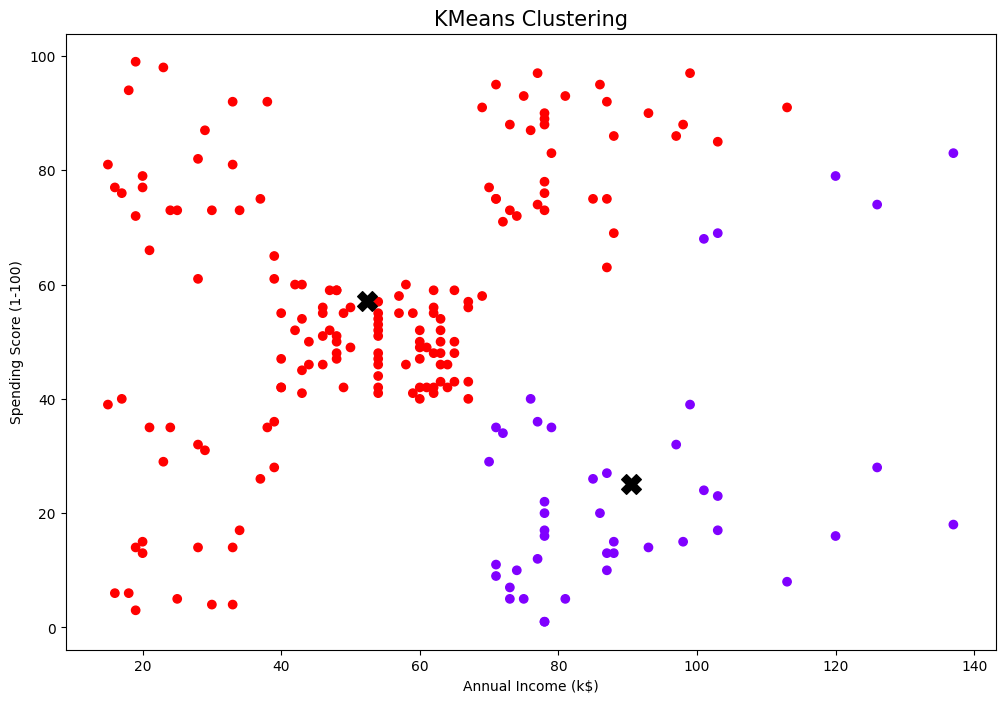

In [29]:
# Create a scatter plot with cluster assignments and cluster centers
plt.figure(figsize=(12, 8))  # Set the figure size

# Scatter plot with points colored by cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')

# Scatter plot with cluster centers in black
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200)

plt.xlabel("Annual Income (k$)")  # Set the label for the x-axis
plt.ylabel("Spending Score (1-100)")  # Set the label for the y-axis
plt.title("KMeans Clustering", fontsize=15)  # Set the title
plt.show()  # Display the plot


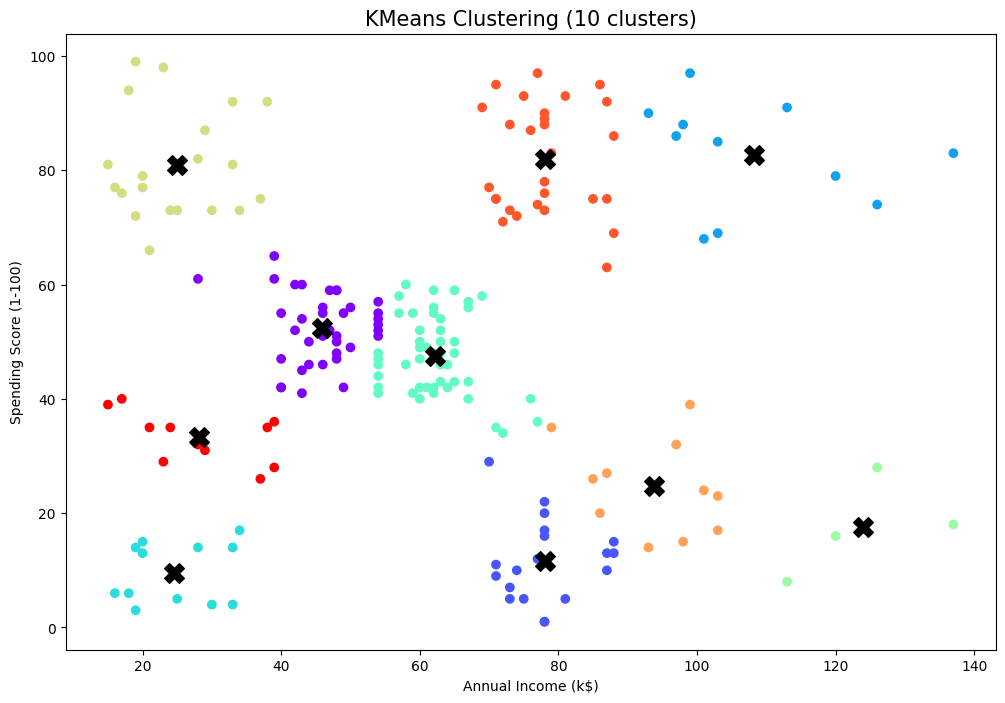

In [30]:
# Create a scatter plot with 10 clusters and cluster centers
plt.figure(figsize=(12, 8))  # Set the figure size

# Instantiate KMeans with 10 clusters and fit to the data
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

# Scatter plot with points colored by cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')

# Scatter plot with cluster centers in black
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200)

plt.xlabel("Annual Income (k$)")  # Set the label for the x-axis
plt.ylabel("Spending Score (1-100)")  # Set the label for the y-axis
plt.title("KMeans Clustering (10 clusters)", fontsize=15)  # Set the title
plt.show()  # Display the plot


**Elbow Curve**

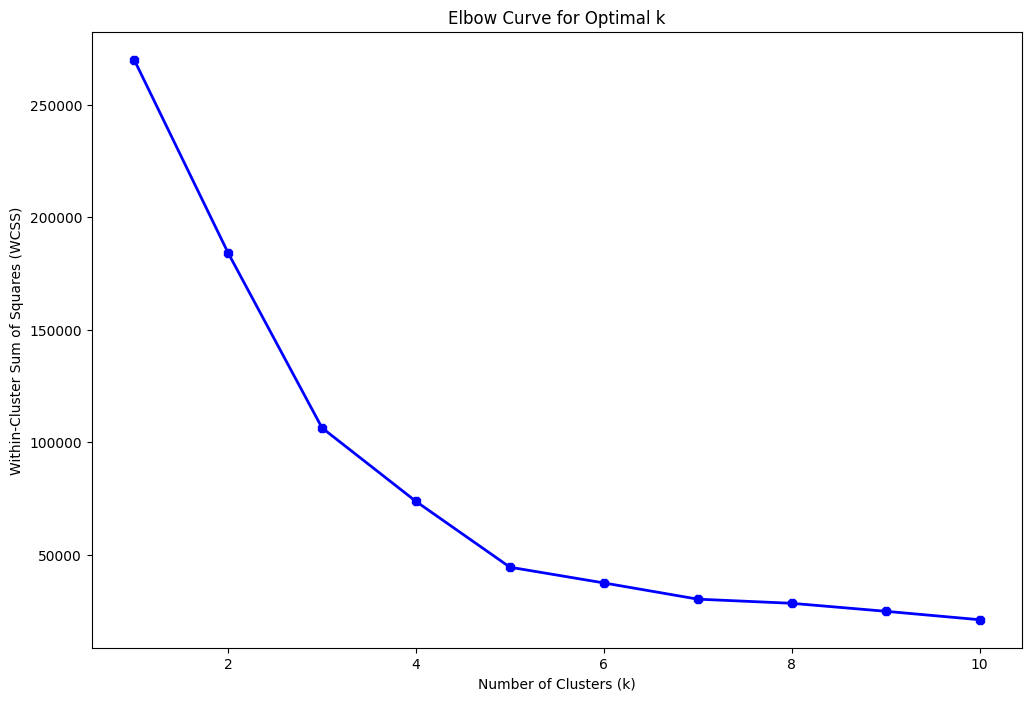

In [31]:
plt.figure(figsize=(12, 8))

wcss = []  # List to store the Within-Cluster Sum of Squares for different values of k

# Iterate through different values of k to find the elbow point
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# kmeans.inertia_: Represents the WCSS, which is the sum of squared distances from each point to its assigned cluster center.

# Plot the elbow curve
plt.plot(range(1, 11), wcss, linewidth=2, color="blue", marker="8")
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

The plot will show a curve, and you can visually inspect it to find the "elbow" point, where the rate of decrease in WCSS slows down. This point often indicates the optimal number of clusters for your dataset.

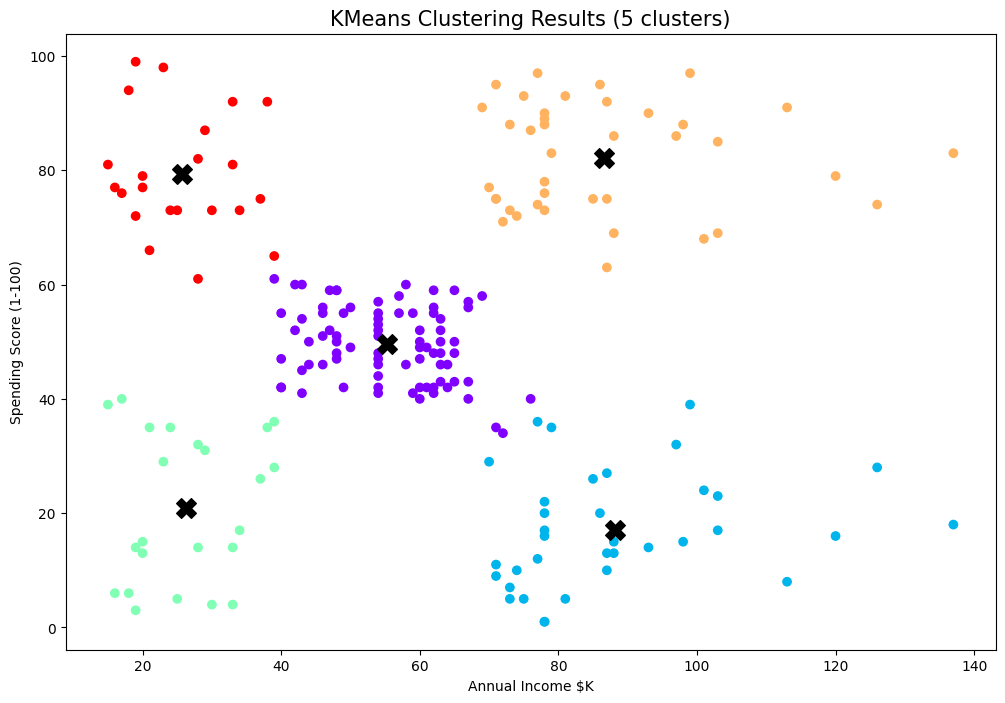

In [32]:
plt.figure(figsize=(12, 8))

# Instantiate KMeans with 5 clusters and fit to the data
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Scatter plot with points colored by cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')

# Scatter plot with cluster centers in black
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200)

plt.xlabel('Annual Income $K')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering Results (5 clusters)', fontsize=15)
plt.show()
